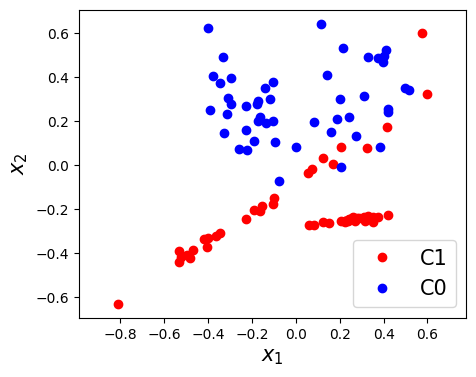

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvx
from sklearn.datasets import make_classification
from Models import KernelClassifier

#simple dataset for test and validation - 2 or 3 features can be used
X, Y = make_classification(n_samples=100,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_repeated=0,
                            n_classes=2,#4,
                            n_clusters_per_class=2,
                            class_sep=1.5,
                            hypercube=True,
                            random_state=None,
                            shuffle=True,
                            scale=0.25
                            )

plt.figure(figsize=(5, 4))
plt.plot(X[Y==0,0], X[Y==0,1], 'ro', label = 'C1')
plt.plot(X[Y==1,0], X[Y==1,1], 'bo', label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.axis('equal')
plt.legend(loc = 4, fontsize = 15)
plt.show()


kernel [polynomial] - loss [logistic]
	Erro final do treinamento:  7.0
	Training time:  0.025079965591430664
	Predict time:  0.00013566017150878906

kernel [polynomial] - loss [soft_margin]
	Erro final do treinamento:  6.0
	Training time:  0.010094404220581055
	Predict time:  0.00013208389282226562

kernel [polynomial] - loss [quadratic_soft_margin]
	Erro final do treinamento:  7.0
	Training time:  0.016420364379882812
	Predict time:  0.00012922286987304688

kernel [polynomial] - loss [squared_loss]
	Erro final do treinamento:  10.0
	Training time:  0.008678197860717773
	Predict time:  0.00013208389282226562

kernel [polynomial] - loss [e-insensitive]
	Erro final do treinamento:  6.0
	Training time:  0.012905597686767578
	Predict time:  0.00012922286987304688


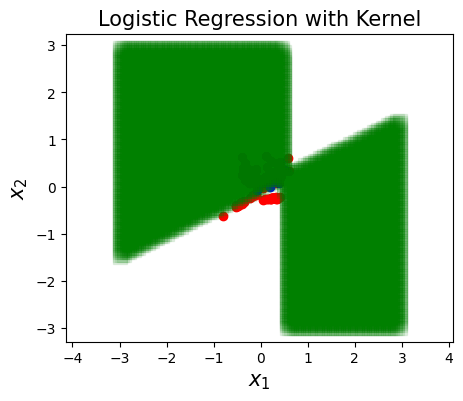

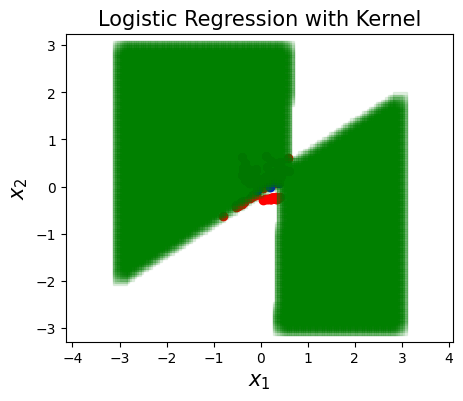

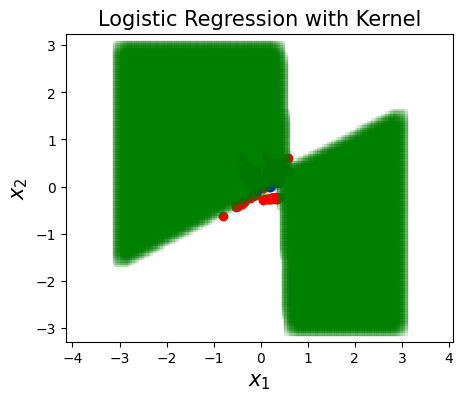

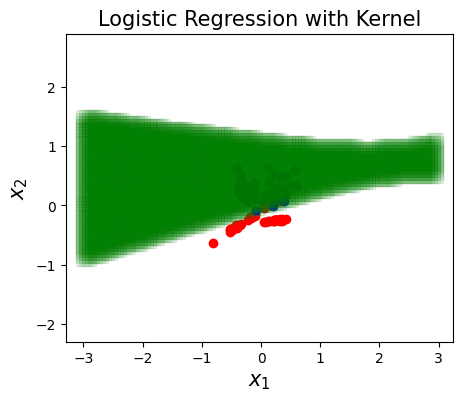

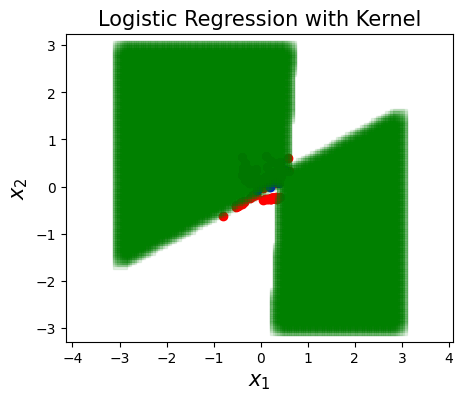

In [3]:
kernels = ['polynomial']
losses = ['logistic', 'soft_margin','quadratic_soft_margin','squared_loss','e-insensitive']

for kernel in kernels:
    for loss in losses:
        print("\nkernel [" + kernel + "] - loss [" + loss + "]")

        # w = w.value
        model = KernelClassifier(kernel=kernel, loss=loss)

        fit_start_time = time.time()
        model.fit(X,Y)
        fit_end_time = time.time() # in seconds
        w = model.params

        predict_start_time = time.time()
        Yl = model.predict(X)
        predict_end_time = time.time() # in seconds

        model.save("./data/models/test.cvx")

        print("\tErro final do treinamento: ",np.sum(abs(Yl-Y)))
        print("\tTraining time: ",(fit_end_time - fit_start_time))
        print("\tPredict time: ",(predict_end_time - predict_start_time))

        #generating grid to check regions based on classification
        [X1gr, X2gr] = np.meshgrid(np.arange(-3,3,0.05), np.arange(-3,3,0.05))
        if X.shape[1] == 2:
            Xgr = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
        else:
            Xgr = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1), np.ones([X1gr.shape[0]*X1gr.shape[1], 1])])
        Ygr = model.predict(Xgr)
        plt.figure(figsize=(5, 4))
        plt.plot(X[Y==0,0], X[Y==0,1], 'ro', label = 'C1')
        plt.plot(X[Y==1,0], X[Y==1,1], 'bo', label = 'C0')
        plt.plot(Xgr[Ygr==1,0], Xgr[Ygr==1,1], 'gs', markersize = 10, alpha = 0.1, label = 'Logistic Regression')
        plt.title('Logistic Regression with Kernel', fontsize = 15)
        plt.xlabel(r'$x_1$', fontsize = 15)
        plt.ylabel(r'$x_2$', fontsize = 15)
        plt.axis('equal')